In [12]:
pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp38-cp38-macosx_10_13_x86_64.whl (7.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

/Users/rajatnathan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

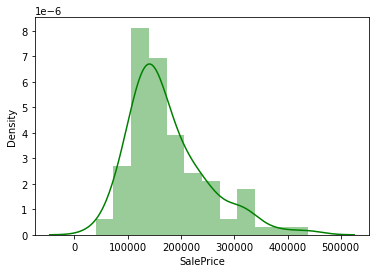

In [52]:
# import data
data = pd.read_csv('houseSmallData.csv')

#show statistics of dependent variable Y: 'SalePrice'
sns.distplot(data['SalePrice'],color = 'g')
data['SalePrice'].describe()

In [53]:
##CLEAN and RESHAPE the data
#Exclude high % NaN columns - basically anything >15% NaN
#interpolate the remaining columns
cols_train = data.isnull().sum().sort_values(ascending=False)[5:].index
data_clean = data[cols_train].interpolate()

#identify columns that have string values as candidates for one hot encoding
#;remember to drop these columns afterwards
df_onehot = data_clean.select_dtypes(include = 'object')

#create prefixes for one hot encoding and join with original dataframe
col_lst = []
for i in range(len(df_onehot.columns)):
   col_lst.append(list(df_onehot.columns)[i])
col_lst    

one_hot = pd.get_dummies(df_onehot,prefix = col_lst)
df_post_onehot = data_clean.join(one_hot)

#drop the categorical columns to prepare the final data set
data_corr = df_post_onehot.drop(df_onehot.columns,axis = 1)




In [74]:
#create correlation matrix and associated dataframe using Top 8 correlated variables to dependent variable 'SalePrice'
#new correlation column added here : col_5_Ex relates to column,value:'BsmtQual','Ex'
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement

corr = data_corr.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:9].index


SalePrice       1.000000
OverallQual     0.855061
GrLivArea       0.735129
GarageArea      0.688249
BsmtQual_Ex     0.680094
GarageCars      0.663441
YearBuilt       0.658636
TotalBsmtSF     0.616297
GarageYrBlt     0.589361
FullBath        0.579505
MasVnrArea      0.571836
TotRmsAbvGrd    0.553603
Name: SalePrice, dtype: float64

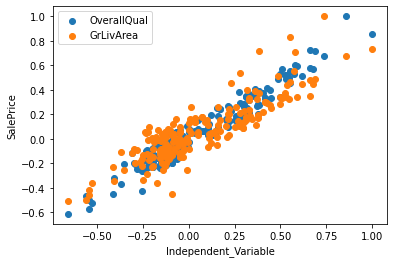

In [94]:
#drawing plots for individul variables with high correlation values in the correlation matrix

plt.scatter(corr['SalePrice'],corr['OverallQual'],label = 'OverallQual')
plt.scatter(corr['SalePrice'],corr['GrLivArea'],label = 'GrLivArea')
plt.legend(loc=2)
plt.ylabel('SalePrice')
plt.xlabel('Independent_Variable')
corr['SalePrice'].sort_values(ascending=False)[0:12]

Text(0.5, 0, 'Independent_Variable')

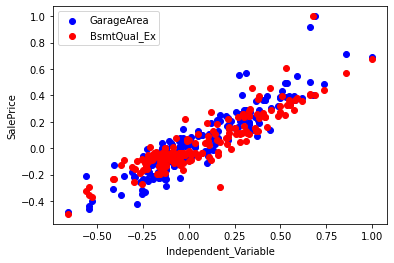

In [98]:
#drawing plots for individul variables with high correlation values in the correlation matrix
plt.scatter(corr['SalePrice'],corr['GarageArea'],label = 'GarageArea',color='b')
plt.scatter(corr['SalePrice'],corr['BsmtQual_Ex'],label = 'BsmtQual_Ex',color='r')
plt.legend(loc=2)
plt.ylabel('SalePrice')
plt.xlabel('Independent_Variable')

Text(0.5, 0, 'Independent_Variable')

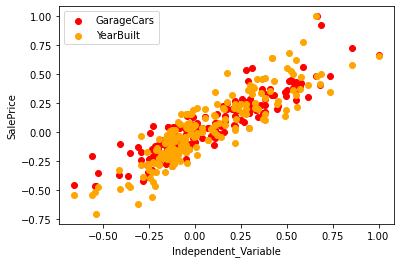

In [105]:
#drawing plots for individul variables with high correlation values in the correlation matrix
plt.scatter(corr['SalePrice'],corr['GarageCars'],label = 'GarageCars',color='red')
plt.scatter(corr['SalePrice'],corr['YearBuilt'],label = 'YearBuilt',color='orange')
plt.legend(loc=2)
plt.ylabel('SalePrice')
plt.xlabel('Independent_Variable')


Text(0.5, 0, 'Independent_Variable')

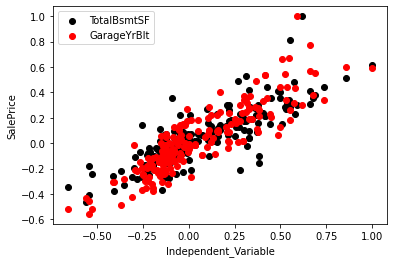

In [108]:
#drawing plots for individul variables with high correlation values in the correlation matrix
plt.scatter(corr['SalePrice'],corr['TotalBsmtSF'],label = 'TotalBsmtSF',color='black')
plt.scatter(corr['SalePrice'],corr['GarageYrBlt'],label = 'GarageYrBlt',color='red')
plt.legend(loc=2)
plt.ylabel('SalePrice')
plt.xlabel('Independent_Variable')

In [76]:
#create independent and dependent columns for linear regression
X = data_corr[cols].drop(['SalePrice'],axis = 1)
Y = data_corr['SalePrice']

In [77]:
#implement linear regression model using sklearn from scikit-learn
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
print(f"R^2 of the the model:{model.score(X,Y)}")


R^2 of the the model:0.8824472376719946


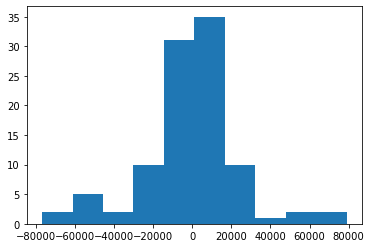

/Users/rajatnathan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


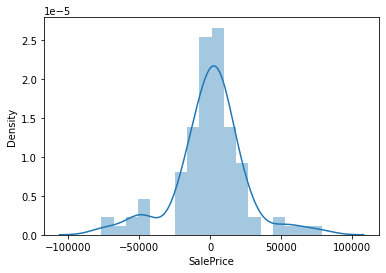

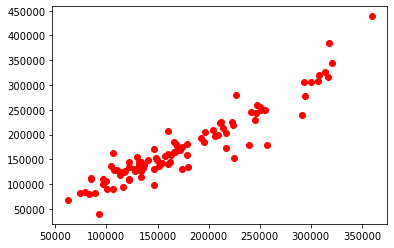

In [47]:
#create visual plots
plt.hist(Y-predictions)
plt.show()
sns.distplot(Y-predictions)
plt.show()
plt.scatter(predictions,Y,color = 'r')
plt.show()

In [48]:
#running model on test data
test = pd.read_csv('jtest.csv')
test.shape
test

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
96,196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
97,197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
98,198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


In [49]:
#normalizing test data by creating extra columns for categorical columns related to one hot encoding given that one of the independent variables
#..belongs to categorical data transformation from one hot

#identify columns that have string values as candidates for one_hot
#;remember to drop these columns afterwards
df_onehot_test = test.select_dtypes(include = 'object')

#create prefixes for one hot encoding and join with original dataframe
col_lst_test = []
for i in range(len(df_onehot_test.columns)):
   col_lst_test.append(list(df_onehot_test.columns)[i])
col_lst_test

one_hot_test = pd.get_dummies(df_onehot_test,prefix = col_lst_test)
df_post_onehot_test = test.join(one_hot_test)


#drop the categorical columns
data_norm_onehot_test = df_post_onehot_test.drop(df_onehot_test.columns,axis = 1)

data_norm_onehot_test


,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MiscFeature_Shed,SaleType_COD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,100,101,20,NaN,10603,6,7,1977,2001,28.0,...,0,0,0,0,1,0,0,0,1,0
1,101,102,60,77.0,9206,6,5,1985,1985,336.0,...,0,0,0,0,1,0,0,0,1,0
2,102,103,90,64.0,7018,5,5,1979,1979,0.0,...,0,0,0,0,1,0,1,0,0,0
3,103,104,20,94.0,10402,7,5,2009,2009,0.0,...,0,0,0,0,1,0,0,0,1,0
4,104,105,50,NaN,7758,7,4,1931,1950,600.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,24.0,2280,6,6,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
96,196,197,20,79.0,9416,7,5,2007,2007,205.0,...,0,0,0,1,0,0,0,0,0,1
97,197,198,75,174.0,25419,8,4,1918,1990,0.0,...,0,0,0,0,1,1,0,0,0,0
98,198,199,75,92.0,5520,6,6,1912,1950,0.0,...,0,0,0,0,1,1,0,0,0,0


In [10]:
#creating independent (X) and dependent(Y) variables in the test dataframe

X_test = data_norm_onehot_test[cols].drop(['SalePrice'],axis = 1)
Y_test = data_norm_onehot_test['SalePrice']

#data requires interepolation due to NaN values in 'GarageYrBlt'
test_X = X_test.interpolate()
test_X

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt
0,6,1610,480,0,2,1977,1610,1977.0
1,6,1732,476,0,2,1985,741,1985.0
2,5,1535,410,0,2,1979,0,1979.0
3,7,1226,740,0,3,2009,1226,2009.0
4,7,1818,240,0,1,1931,1040,1951.0
...,...,...,...,...,...,...,...,...
95,6,1456,440,0,2,1976,855,1976.0
96,7,1726,786,1,3,2007,1726,2007.0
97,8,3112,795,0,2,1918,1360,1918.0
98,6,2229,0,0,0,1912,755,1961.0


In [11]:
#testing the efficacy of the model on test data
predictions = model.predict(test_X)
print(f"R^2 of the the model:{model.score(test_X,Y_test)}")

R^2 of the the model:0.7705677801288706


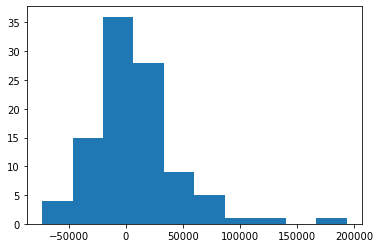

/Users/rajatnathan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


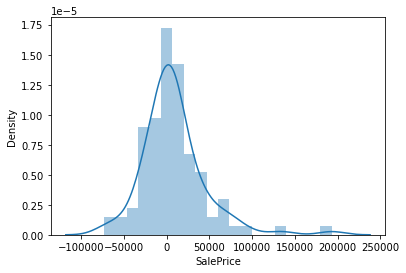

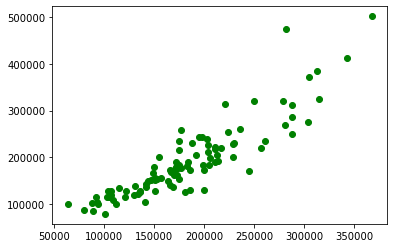

In [12]:
#create visual plots
plt.hist(Y_test-predictions)
plt.show()
sns.distplot(Y_test-predictions)
plt.show()
plt.scatter(predictions,Y_test,color = 'g')
plt.show()